# Understanding and predicting customer behaviour 

## Telecom customer churn

<hr>

<b>
Dataset : Telco customer churn <br>
Source : https://www.kaggle.com/blastchar/telco-customer-churn ( IBM Sample dataset)
</b>

Here, IBM provided customer data for Telco industry to predict behaviour of the customers. Main objective is that to analyze customer behavious and develop strategies for customer retention.

Dataset has information related,
- Demographic: gender, age range and if they have any partner or dependent.
- Usage: User has phone or internet service. Also information related to multiline phone, streaming services and many more.
- Account type: How long they have been a customer, contract type, payment method, paperless billing, monthly charges.

## Main objective of this notebook is to explore this domain and learn about the subject using Exploratory Data Analysis (EDA).

### In this notebook,
- First we understand about the dataset
- Then we clean the dataset and make it ready for analysis
- After that, we explore data in detail using EDA


### Problem / Objective of this analysis:
- Predict customer behaviour to <b>reduce customer churn rate</b> and <b>improve customer retention</b>. And churn rate formula is,
<img src='./churn_model.png'></img>

Assumption: Let's assume that all the records given in this dataset are for particular interval.


## Obtain & Explore dataset

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

sns.set()
%matplotlib inline

In [206]:
# loading data
df_raw = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [207]:
df_raw.shape # dataset has 7043 records and 21 features

(7043, 21)

In [208]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [209]:
# checking null values
df_raw.isnull().any() # Dataset has no null value

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [210]:
# type, null/not null and no of records in each feature
df_raw.info() # here we are interested in churn column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Data Cleaning

Here, we are going to rename some columns as well as modifying records with proper format for further analysis.

In [247]:
df_cal = df_raw.copy()
df_cal.rename(columns={'gender':'Gender'
                       ,'customerID':'CustomerID'
                       ,'Contract':'ContractType'
                       ,'InternetService':'InternetServiceType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)


df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})

df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})
df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})

df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.5,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [248]:
# Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them
print(df_cal[df_cal['TotalCharges']==' '][['MonthlyCharges','TotalCharges']]) 
df_cal.loc[df_cal['TotalCharges']==' ','TotalCharges'] = np.nan

      MonthlyCharges TotalCharges
488            52.55             
753            20.25             
936            80.85             
1082           25.75             
1340           56.05             
3331           19.85             
3826           25.35             
4380           20.00             
5218           19.70             
6670           73.35             
6754           61.90             


In [249]:
# first we convert TotalCharges to float and then replace with tenure * monthly charges
df_cal['TotalCharges'] = df_cal['TotalCharges'].astype('float64')
df_cal.loc[df_cal['TotalCharges']==np.nan,'TotalCharges'] = df_cal['MonthlyCharges'] * df_cal['Tenure']

In [250]:
def createAnyInternetService(row):
    if ((row["OnlineSecurity"]==1)| (row['OnlineBackup']==1) | (row['DeviceProtection']==1) | (row['TechSupport']==1) 
        | (row['StreamingTV']==1) | (row['StreamingMovies']==1)):
        return 1
    else:
        return 0 
                
df_cal['AnyInternetService'] = df_cal.apply(lambda row: createAnyInternetService(row), axis = 1)
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,AnyInternetService
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0


Here, below output shows the final data structure of the dataset.

- Demographic related information
    - Gender
    - SeniorCitizen
    - Parter
    - Dependents
- Usage related information
    - PhoneService
    - MultipleLines
    - InternetServiceType
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
- Account related information
    - Tenure
    - IsContract
    - ContractType
    - PaperlessBilling
    - PaymentMethod
    - MonthlyCharges
    - TotalCharges
    
Here, dichotonic variables are Gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, IsContract and PaperlessBilling; While continuour variables are Tenure, MonthlyCharges and TotalCharges. Norminal variables are InternetServiceType, ContractType and PaymentMethod.

In [296]:
df_cal.dtypes

CustomerID              object
Gender                  object
SeniorCitizen            int64
Partner                  int64
Dependents               int64
Tenure                   int64
PhoneService             int64
MultipleLines            int64
InternetServiceType     object
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64
ContractType            object
PaperlessBilling         int64
PaymentMethod           object
MonthlyCharges         float64
TotalCharges           float64
Churn                    int64
InternetService          int64
IsContracted             int64
AnyInternetService       int64
Tenure_norm            float64
MonthlyCharges_norm    float64
Cluster                  int64
dtype: object

In [297]:
# let's have basic analysis of all features

df_cal.describe(include='all')

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,AnyInternetService,Tenure_norm,MonthlyCharges_norm,Cluster
count,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,...,7043,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,2,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3445-HXXGF,Male,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,...,Electronic check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3555,NaN,NaN,NaN,NaN,NaN,NaN,3096,NaN,...,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,NaN,0.286668,...,NaN,64.761692,2283.300441,0.265370,0.783331,0.449808,0.684935,0.449599,0.462803,-0.539259
std,NaN,NaN,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,NaN,0.452237,...,NaN,30.090047,2266.771362,0.441561,0.412004,0.497510,0.464575,0.341104,0.299403,0.876813
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,...,NaN,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,0.000000,...,NaN,35.500000,401.450000,0.000000,1.000000,0.000000,0.000000,0.125000,0.171642,-1.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,0.000000,...,NaN,70.350000,1397.475000,0.000000,1.000000,0.000000,1.000000,0.402778,0.518408,-1.000000
75%,NaN,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,1.000000,...,NaN,89.850000,3794.737500,1.000000,1.000000,1.000000,1.000000,0.763889,0.712438,0.000000


## EDA - Exploratory Data Analysis

So far, we know that telco data has 7043 customers' data with 24 features (including 3 calculative features which we added) and has information related to demographic, usage and account types.

Our next objective would be,

- Calculate churn rate
- Find out the features which helps distinguise churn customers and existing customers
     - Distribution of features<br>
     - Correlation between features<br>
     - Clusturing in churn customers<br>
       

In [298]:
# Calculate churn rate of telco company's dataset?

Churn_rate = df_cal['Churn'].value_counts() / df_cal.shape[0]
Churn_rate 


# from output, churn rate is around 26%

0    0.73463
1    0.26537
Name: Churn, dtype: float64

#### Churn vs existing customer 

Our hypothesis is that customer left company because of 
- High monthly charges
- Poor customer service
- Better compatitor offers

From above reasons and based on our dataset, we can varify first season. 

And from below analysis,
- We varified that one the reason to leave brand is high monthly charges
- And some the characteristics of churn customers is that internet service usage, paperless billing method and electronic check payment method.

In [299]:
# calculate mean summary of customers (Churn vs non churn). 
churn_summary = df_cal.groupby('Churn')
print(churn_summary['Tenure','MonthlyCharges'].mean())


def dichotomus_var_summary(feature):
        print(feature," summary: \n ", churn_summary[feature].value_counts(normalize=True))

categorical_var = ['Gender','SeniorCitizen','Partner','Dependents','PhoneService','InternetService','ContractType','PaperlessBilling','PaymentMethod']

for i in categorical_var:
    dichotomus_var_summary(i)



          Tenure  MonthlyCharges
Churn                           
0      37.569965       61.265124
1      17.979133       74.441332
Gender  summary: 
  Churn  Gender
0      Male      0.507344
       Female    0.492656
1      Female    0.502408
       Male      0.497592
Name: Gender, dtype: float64
SeniorCitizen  summary: 
  Churn  SeniorCitizen
0      0                0.871279
       1                0.128721
1      0                0.745318
       1                0.254682
Name: SeniorCitizen, dtype: float64
Partner  summary: 
  Churn  Partner
0      1          0.528218
       0          0.471782
1      0          0.642055
       1          0.357945
Name: Partner, dtype: float64
Dependents  summary: 
  Churn  Dependents
0      0             0.655199
       1             0.344801
1      0             0.825575
       1             0.174425
Name: Dependents, dtype: float64
PhoneService  summary: 
  Churn  PhoneService
0      1               0.901044
       0               0.098956
1     

#### Distribution of Tenure, Monthly Charges

Right now, in our dataset, we have continuos variables are Tenure, MonthlyCharges and TotalCharges. so let's deep dive into this variables.

- Tenure Distribution shows that customers who has tenure around less than a year left the brand more
- Monthly Charges Distribution shows that customers who has around more than $65 left brands more

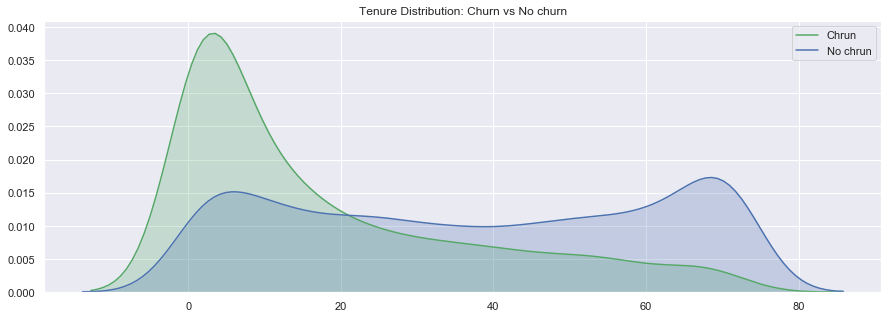

In [300]:
fig = plt.figure(figsize=(15,5))

ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1),'Tenure']
                     , color = 'g'
                     , shade = True
                     , label='Chrun')

ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0) ,'Tenure']
                     , color = 'b'
                     , shade = True
                     , label='No chrun')

plt.title("Tenure Distribution: Churn vs No churn")
plt.show()

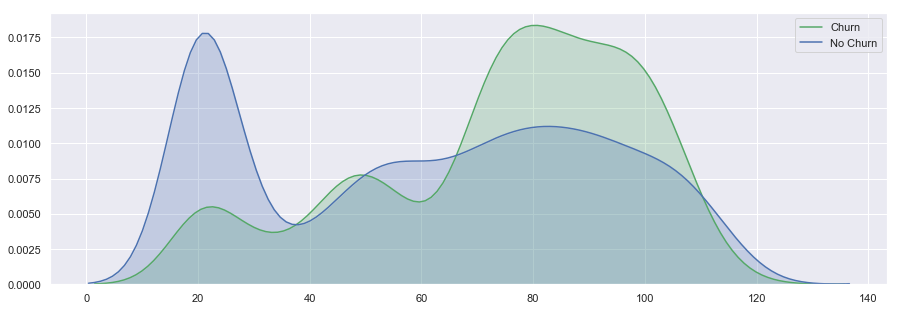

In [301]:
fig = plt.figure(figsize=(15,5))
ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1 ),'MonthlyCharges']
                     , color = 'g'
                     , shade = True
                     , label='Churn')
ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0 ),'MonthlyCharges']
                     , color = 'b'
                     , shade = True
                     , label='No Churn')
plt.show()

#### Tenure vs Monthly charges

Let's check is there any relationship between Tenure and MonthlyCharges. From the analysis, we can see that there are some clusters related to churn based on tenure and monthly charges.

In [304]:
# normalized tenure and monthlycharges

df_cal['Tenure_norm'] = (df_cal['Tenure'] - df_cal['Tenure'].min()) / (df_cal['Tenure'].max() - df_cal['Tenure'].min())
df_cal['MonthlyCharges_norm'] = (df_cal['MonthlyCharges'] - df_cal['MonthlyCharges'].min())/ (df_cal['MonthlyCharges'].max() - df_cal['MonthlyCharges'].min())
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,AnyInternetService,Tenure_norm,MonthlyCharges_norm,Cluster
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Electronic check,29.85,29.85,0,1,0,1,0.013889,0.115423,-1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,Mailed check,56.95,1889.50,0,1,1,1,0.472222,0.385075,-1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Mailed check,53.85,108.15,1,1,0,1,0.027778,0.354229,2
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,Bank transfer (automatic),42.30,1840.75,0,1,1,1,0.625000,0.239303,-1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Electronic check,70.70,151.65,1,1,0,0,0.027778,0.521891,0


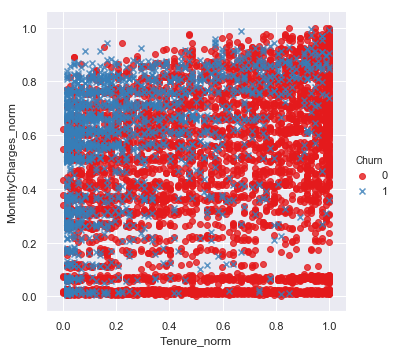

In [305]:
sns.lmplot(x='Tenure_norm',y='MonthlyCharges_norm',data=df_cal
               ,hue='Churn'
               ,fit_reg=False
               ,markers=["o", "x"]
               ,palette="Set1"
          )
plt.show() # from output, we can see that there are some clusters

#### K-means clustering

Text(0.5,1,'Elbow curve')

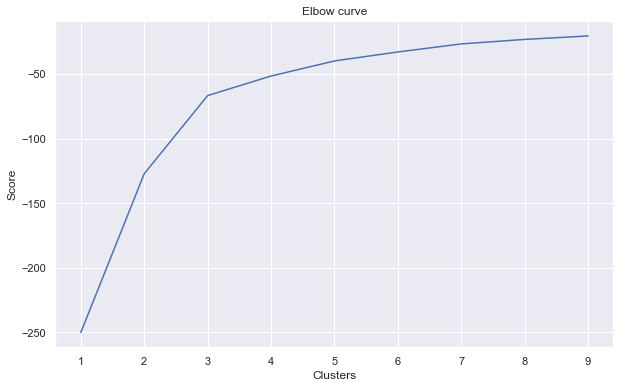

In [306]:
from sklearn.cluster import KMeans

df_kmeans_data = df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']]

k = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in k]

score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

plt.figure(figsize=(10,6))
plt.plot(k,score)
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.title("Elbow curve")

# from output, 3 looks more resonable

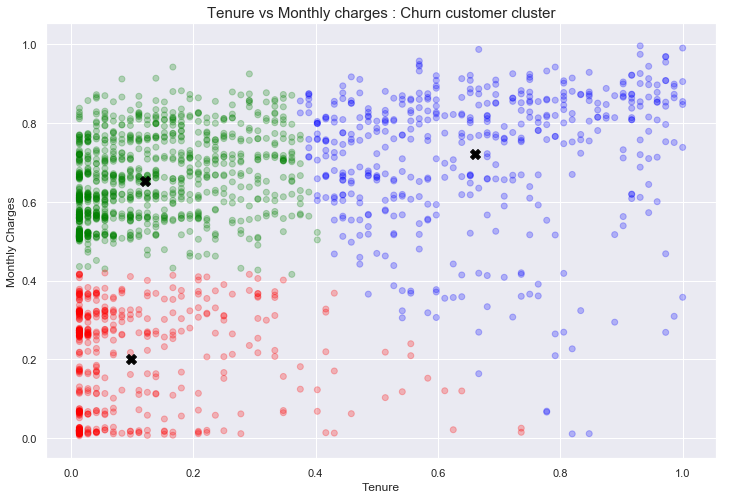

In [307]:
df_cal['Cluster'] = -1 # by default set Cluster to -1

kmeans = KMeans(n_clusters=3 # No of cluster in data
                , random_state = 2 # Selecting same training data
               ) 

kmeans.fit(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])
kmean_colors = ['green' if c == 0 else 'blue' if c == 1 else 'red' for c in kmeans.labels_]

df_cal.loc[(df_cal.Churn==1),'Cluster'] = kmeans.fit_predict(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])


fig = plt.figure(figsize=(12,8))
plt.scatter(x='Tenure_norm'
            , y='MonthlyCharges_norm'
            , data=df_cal[df_cal.Churn==1] 
            , color=kmean_colors # color of data points
            , alpha=0.25 # transparancy of data points
           )

plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")

plt.scatter(x=kmeans.cluster_centers_[:,0]
            , y=kmeans.cluster_centers_[:,1]
            , color='black'
            , marker='X' # Marker sign for data points
            , s=100 # marker size
           )
plt.title("Tenure vs Monthly charges : Churn customer cluster",fontsize=15)
plt.show()

0    0.507758
1    0.248261
2    0.243981
Name: Cluster, dtype: float64


Text(0.5,1,'Distribution of Clusters')

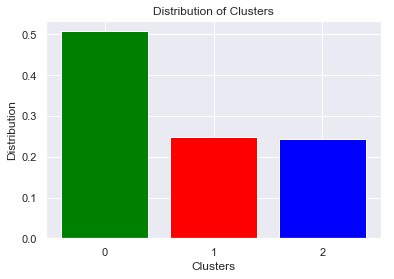

In [320]:
# distribution of cluster
print(df_cal[df_cal['Churn']==1].Cluster.value_counts(normalize=True))

# 0 - Green; 1 - Red; 2 - Blue


plt.bar(x=[0,1,2]
        , height=df_cal[df_cal['Churn']==1].Cluster.value_counts(normalize=True).values
        , tick_label=[0,1,2]
        , color=['Green','red','blue'])
plt.xlabel("Clusters")
plt.ylabel("Distribution")
plt.title("Distribution of Clusters")

There are three types of customer group , who are more likely to churn<br>
1) Low tenure and high monthly charges<br>
2) High tenure and High monthly charges<br>
3) Low tenure and low monthly charges

In [322]:
df_cluster_gp = df_cal[df_cal['Churn']==1].groupby('Cluster')
print(df_cluster_gp['Tenure','MonthlyCharges'].mean())

            Tenure  MonthlyCharges
Cluster                           
0         8.775553       83.821654
1        47.549569       90.731250
2         7.043860       38.343860


### Demographic analysis

Here, we have gender, age bands (in terms of married, have children and senior citizen) related information. 
1) Less tenure and high monthly charges
    - More likely to be Female
2) High tenure and High monthly charges
    - More likely to be male and senior citizen
3) Less tenure and low monthly charges
    - More likely to be male 

In [323]:
group_gp = df_cluster_gp['Gender'].value_counts(normalize=True).to_frame()

#pd.concat([group_gp.index.name , group_gp.values])
group_gp.columns = ['Count']
group_gp = group_gp.reset_index()
group_gp_new = group_gp.copy()
group_gp_new

,Cluster,Gender,Count
0,0,Female,0.531085
1,0,Male,0.468915
2,1,Male,0.519397
3,1,Female,0.480603
4,2,Male,0.535088
5,2,Female,0.464912


In [324]:
df_cluster_gender_gp = df_cal[df_cal['Churn']==1].groupby(['Cluster','Gender'],as_index=False)
tenure_charges_gp =  df_cluster_gender_gp['Tenure','MonthlyCharges'].mean()
tenure_charges_gp

,Cluster,Gender,Tenure,MonthlyCharges
0,0,Female,8.418651,83.463889
1,0,Male,9.179775,84.226854
2,1,Female,45.699552,90.538117
3,1,Male,49.261411,90.909959
4,2,Female,7.231132,37.701651
5,2,Male,6.881148,38.901844


In [325]:
gender_eda = pd.merge(group_gp_new
                      , tenure_charges_gp
                      , on=['Cluster','Gender']
                      , how='inner')

print("Gender summary\n" , gender_eda)


demographic_gp = gender_eda.drop_duplicates(subset=['Cluster'],keep='first').reset_index()
demographic_gp.drop(['index'],axis=1,inplace=True)
demographic_gp.columns = ['Cluster','Label','Count','Tenure','MonthlyCharges']
demographic_gp['Marker'] = ['X','X','X']
demographic_gp['Marker_index'] = [[1,-1],[1,-1],[1,-1]]

print("Gender & Cluster \n ",demographic_gp)

Gender summary
    Cluster  Gender     Count     Tenure  MonthlyCharges
0        0  Female  0.531085   8.418651       83.463889
1        0    Male  0.468915   9.179775       84.226854
2        1    Male  0.519397  49.261411       90.909959
3        1  Female  0.480603  45.699552       90.538117
4        2    Male  0.535088   6.881148       38.901844
5        2  Female  0.464912   7.231132       37.701651
Gender & Cluster 
     Cluster   Label     Count     Tenure  MonthlyCharges Marker Marker_index
0        0  Female  0.531085   8.418651       83.463889      X      [1, -1]
1        1    Male  0.519397  49.261411       90.909959      X      [1, -1]
2        2    Male  0.535088   6.881148       38.901844      X      [1, -1]


In [326]:
df_cluster_seniorcitizen_cnt = df_cluster_gp['SeniorCitizen'].value_counts(normalize=True)

df_cluster_seniorcitizen_gp = df_cal[df_cal['Churn']==1].groupby(['Cluster','SeniorCitizen'],as_index=False)
df_cluster_seniorcitizen_gp = df_cluster_seniorcitizen_gp['Tenure','MonthlyCharges'].mean()
df_cluster_seniorcitizen_gp = df_cluster_seniorcitizen_gp[(df_cluster_seniorcitizen_gp['Cluster']==1) 
                                  & (df_cluster_seniorcitizen_gp['SeniorCitizen']==1)]


demographic_gp = demographic_gp.append(pd.DataFrame({"Cluster":[1]
                                    ,'Label':['SeniorCitizen']
                                    ,'Count': [df_cluster_seniorcitizen_cnt[1][1]]
                                    ,'Tenure':df_cluster_seniorcitizen_gp['Tenure'].values
                                    ,'MonthlyCharges':df_cluster_seniorcitizen_gp['MonthlyCharges'].values
                                    ,'Marker':['o']
                                    ,'Marker_index' : [[-10,-1]]
                                                     
                                   })
                      ,ignore_index=True)
print(demographic_gp)

   Cluster          Label     Count     Tenure  MonthlyCharges Marker  \
0        0         Female  0.531085   8.418651       83.463889      X   
1        1           Male  0.519397  49.261411       90.909959      X   
2        2           Male  0.535088   6.881148       38.901844      X   
3        1  SeniorCitizen  0.323276  46.166667       91.943333      o   

  Marker_index  
0      [1, -1]  
1      [1, -1]  
2      [1, -1]  
3    [-10, -1]  


Same thing we can do for partner and depdendent variable.

In [327]:
df_cluster_partner_cnt = df_cluster_gp['Partner'].value_counts(normalize=True)
print(df_cluster_partner_cnt)

Cluster  Partner
0        0          0.699684
         1          0.300316
1        1          0.588362
         0          0.411638
2        0          0.756579
         1          0.243421
Name: Partner, dtype: float64


In [328]:
df_cluster_dependent_cnt = df_cluster_gp['Dependents'].value_counts(normalize=True)
print(df_cluster_dependent_cnt)

Cluster  Dependents
0        0             0.857745
         1             0.142255
1        0             0.782328
         1             0.217672
2        0             0.802632
         1             0.197368
Name: Dependents, dtype: float64


### Usage analysis

In [329]:
'''
Usage related information


Phone service - 

PhoneService             int64
MultipleLines            int64

Internet service - 
InternetServiceType     object
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64

Contract type - ContractType
'''


df_usage = df_cal[df_cal['Churn']==1].groupby('Churn') 


Here, we will explore how usage will help us to retain customers.

- Is phone/Internet service helps to understand customers' churn behaviour?
- Is streaming TV/Movies useful to retain customers?

Let's explore phone service first.

- From analysis - phone service doesn't help to understand churn customers behaviour.

In [330]:
# Does phone service helps to retain customers?

print("Phone service distribution \n",df_cal['PhoneService'].value_counts(normalize=True))

print("Phone & churn distribution \n",df_cal.groupby('Churn')['PhoneService'].value_counts(normalize=True))

# From second output, Churn customers have same distribution as active customers.

Phone service distribution 
 1    0.903166
0    0.096834
Name: PhoneService, dtype: float64
Phone & churn distribution 
 Churn  PhoneService
0      1               0.901044
       0               0.098956
1      1               0.909042
       0               0.090958
Name: PhoneService, dtype: float64


Let's explore internet service.

- Insights - From analysis, most of the subscriber(93%) who left has internet service.

In [331]:
# is internet service helps to keep customers?

print(df_cal['InternetService'].value_counts(normalize=True))

churn_internet = df_cal.groupby('Churn')['InternetService'].value_counts(normalize=True)
churn_internet = churn_internet.reset_index(name="Percentage")
print(churn_internet)

# Insights - Most of the churn customers have internet services compared to active customers.

1    0.783331
0    0.216669
Name: InternetService, dtype: float64
   Churn  InternetService  Percentage
0      0                1    0.726904
1      0                0    0.273096
2      1                1    0.939540
3      1                0    0.060460


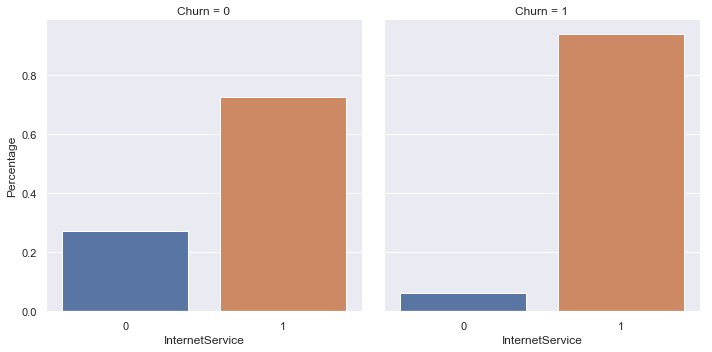

In [332]:
# let's plot above data for better understanding

sns.catplot(x='InternetService'
           , y='Percentage'
           , data = churn_internet
           , col='Churn'
           , kind='bar')

Most of the Chrun subscriber who left has fiber optic service.

In [333]:
df_cal.groupby('Churn')['InternetServiceType'].value_counts(normalize=True)

Churn  InternetServiceType
0      DSL                    0.379204
       Fiber optic            0.347700
       No                     0.273096
1      Fiber optic            0.693954
       DSL                    0.245586
       No                     0.060460
Name: InternetServiceType, dtype: float64

Is there any connection between any streaming(StreamingTV/StreamingMovies) service and churn subscribers?

In [334]:
def StreamingService(row):
    if (row.StreamingTV ==1) | (row.StreamingMovies ==1):
        return 1
    else:
        return 0

df_cal['StreamingService'] = df_cal.apply(lambda row: StreamingService(row),axis=1)

In [335]:
df_cluster_internet_cnt = df_cal[(df_cal['InternetService']==1) & (df_cal['Churn']==1)].groupby('Cluster')['StreamingService'].value_counts(normalize=True).reset_index(name='Streaming_perc')

print(df_cluster_internet_cnt)


df_cluster_streaming_gp = df_cal[(df_cal['Churn']==1) & (df_cal['InternetService']==1)].groupby(['Cluster','StreamingService'],as_index=False)
df_cluster_streaming_gp = df_cluster_streaming_gp['Tenure','MonthlyCharges'].mean()
df_cluster_streaming_gp= df_cluster_streaming_gp[((df_cluster_streaming_gp['Cluster']==0) | (df_cluster_streaming_gp['Cluster']==1) ) 
                                  & (df_cluster_streaming_gp['StreamingService']==1)]



demographic_gp = demographic_gp.append(pd.DataFrame({"Cluster":df_cluster_internet_cnt[((df_cluster_internet_cnt['Cluster']== 0) | (df_cluster_internet_cnt['Cluster'] ==1))
                                                                          & (df_cluster_internet_cnt['StreamingService']== 1)].Cluster.values
                                    ,'Label':['StreamingService','StreamingService']
                                    ,'Count': df_cluster_internet_cnt[((df_cluster_internet_cnt['Cluster']== 0) | (df_cluster_internet_cnt['Cluster'] ==1))
                                                                          & (df_cluster_internet_cnt['StreamingService']== 1)].Streaming_perc.values
                                    ,'Tenure':df_cluster_streaming_gp['Tenure'].values
                                    ,'MonthlyCharges':df_cluster_streaming_gp['MonthlyCharges'].values
                                    ,'Marker':['^','^']
                                    ,'Marker_index' : [[1,-1],[1,-1]]
                                     })
                      ,ignore_index=True)

print(demographic_gp)

   Cluster  StreamingService  Streaming_perc
0        0                 1        0.613277
1        0                 0        0.386723
2        1                 1        0.834783
3        1                 0        0.165217
4        2                 0        0.726225
5        2                 1        0.273775
   Cluster             Label     Count     Tenure  MonthlyCharges Marker  \
0        0            Female  0.531085   8.418651       83.463889      X   
1        1              Male  0.519397  49.261411       90.909959      X   
2        2              Male  0.535088   6.881148       38.901844      X   
3        1     SeniorCitizen  0.323276  46.166667       91.943333      o   
4        0  StreamingService  0.613277  10.084192       89.757216      ^   
5        1  StreamingService  0.834783  48.455729       94.630729      ^   

  Marker_index  
0      [1, -1]  
1      [1, -1]  
2      [1, -1]  
3    [-10, -1]  
4      [1, -1]  
5      [1, -1]  


Cluster 0 / 2 subscriber - they are more likely to be month-to-month based with company  
Most of the subscriber who were on contract based and left company, are in group - 1.

In [336]:
df_cal['IsContracted'].value_counts(normalize=True)

0    0.550192
1    0.449808
Name: IsContracted, dtype: float64

In [337]:
df_cluster_gp['IsContracted'].value_counts(normalize=True)

Cluster  IsContracted
0        0               0.983140
         1               0.016860
1        0               0.625000
         1               0.375000
2        0               0.947368
         1               0.052632
Name: IsContracted, dtype: float64

In [338]:
df_cluster_contract_cnt = df_cluster_gp['IsContracted'].value_counts(normalize=True).reset_index(name='IsContracted_per')


df_cluster_contract_gp = df_cal[df_cal['Churn']==1].groupby(['Cluster','IsContracted'],as_index=False)
df_cluster_contract_gp = df_cluster_contract_gp['Tenure','MonthlyCharges'].mean()
df_cluster_contract_gp = df_cluster_contract_gp[((df_cluster_contract_gp['Cluster']==2) | (df_cluster_contract_gp['Cluster']==0) )
                                  & (df_cluster_contract_gp['IsContracted']==1)]

print(df_cluster_contract_cnt[((df_cluster_contract_cnt['Cluster']== 0) | (df_cluster_contract_cnt['Cluster']==1))
                                                                     & (df_cluster_contract_cnt['IsContracted']== 0)].IsContracted_per.values)

demographic_gp = demographic_gp.append(pd.DataFrame({"Cluster":[0,2]
                                    ,'Label':['Month-to-month','Month-to-month']
                                    ,'Count': df_cluster_contract_cnt[((df_cluster_contract_cnt['Cluster']== 0) | (df_cluster_contract_cnt['Cluster']==2))
                                                                     & (df_cluster_contract_cnt['IsContracted']== 0)].IsContracted_per.values
                                    ,'Tenure':df_cluster_contract_gp['Tenure'].values
                                    ,'MonthlyCharges':df_cluster_contract_gp['MonthlyCharges'].values
                                    ,'Marker':['*','*']
                                    ,'Marker_index' : [[1,-1],[1,-1]]
                                                     
                                   })
                      ,ignore_index=True)
print(demographic_gp)

[0.98314015 0.625     ]
   Cluster             Label     Count     Tenure  MonthlyCharges Marker  \
0        0            Female  0.531085   8.418651       83.463889      X   
1        1              Male  0.519397  49.261411       90.909959      X   
2        2              Male  0.535088   6.881148       38.901844      X   
3        1     SeniorCitizen  0.323276  46.166667       91.943333      o   
4        0  StreamingService  0.613277  10.084192       89.757216      ^   
5        1  StreamingService  0.834783  48.455729       94.630729      ^   
6        0    Month-to-month  0.983140  17.062500       86.015625      *   
7        2    Month-to-month  0.947368  22.208333       35.127083      *   

  Marker_index  
0      [1, -1]  
1      [1, -1]  
2      [1, -1]  
3    [-10, -1]  
4      [1, -1]  
5      [1, -1]  
6      [1, -1]  
7      [1, -1]  


Text(0.5,1,'Tenure vs Monthly charges demographic distribution')

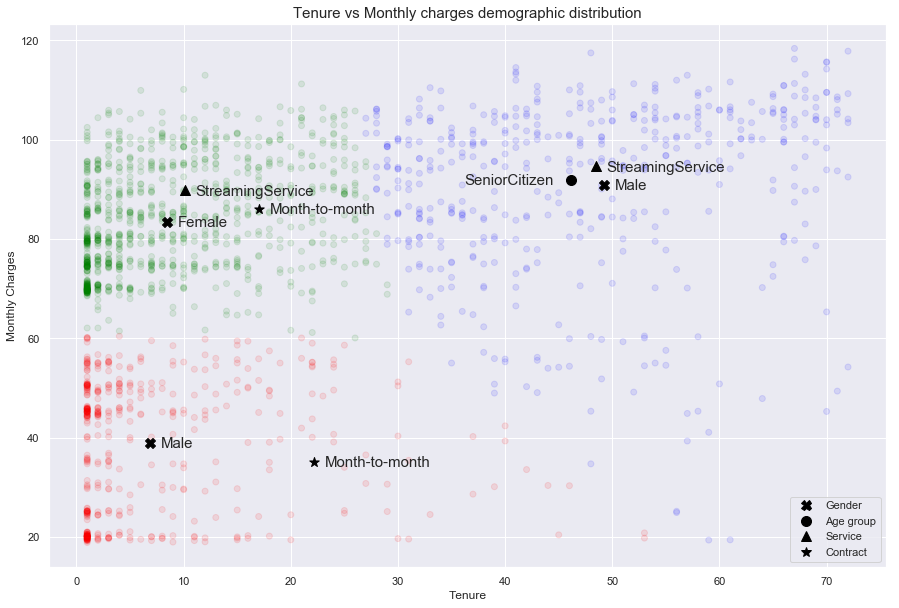

In [341]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(x='Tenure'
            , y='MonthlyCharges'
            , data=df_cal[df_cal.Churn==1] 
            , color=kmean_colors # color of data points
            , alpha=0.10 # transparancy of data points
           )

for i,kind in enumerate(demographic_gp['Marker']):
    ax.scatter(x=demographic_gp['Tenure'][i]
            , y=demographic_gp['MonthlyCharges'][i]
            , color='black'
            , label = demographic_gp['Label'][i]
            , marker=kind # Marker sign for data points
            , s=100 # marker size
           )


genderLegend = mlines.Line2D([], [],color='black', marker='X', linestyle='None',
                          markersize=10, label='Gender')
ageLegend = mlines.Line2D([], [],color='black', marker='o', linestyle='None',
                          markersize=10, label='Age group')
serviceLegend = mlines.Line2D([], [],color='black', marker='^', linestyle='None',
                          markersize=10, label='Service')
contractLegend = mlines.Line2D([], [],color='black', marker='*', linestyle='None',
                          markersize=10, label='Contract')



for i,txt in enumerate(demographic_gp['Label']):
    ax.text(demographic_gp['Tenure'][i] + demographic_gp['Marker_index'][i][0]
            ,demographic_gp['MonthlyCharges'][i] + demographic_gp['Marker_index'][i][1]
            ,txt
            ,fontsize = 15
            )

plt.legend(handles=[genderLegend,ageLegend,serviceLegend,contractLegend])
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("Tenure vs Monthly charges demographic distribution",fontsize=15)